Haifa Azrelli 3DNI1

<center><font size='6px' color='#DC143C'><b>TP n°3 : Linear Regression </b></font>

<div style="font-size: 23px;font-family: Times New Roman;color: DarkRed"><em><strong>Qu’est ce que la Linear regression
</strong></em></div>

<h3>Une régression a pour objectif d’expliquer une variable Y par une autre variable X. Par exemple on peut expliquer les performances d’un athlète par la durée de son entrainement ou même  le salaire d’une personne par le nombre d’années passées à l’université. Dans notre cas on s’intéresse à la régression linéaire qui modélise la relation entre X et Y par une équation linéaire.

<p style="font-size: 20px;font-family: Times New Roman;color: #000000"><strong>Exercice 1: </strong></p>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### La première étape consiste à importer l'ensemble de données à l'aide de Pandas qui permet de travailler facilement avec des données structurées, telles que des fichiers csv 

In [57]:
#importer les données grav.csv
haifa = pd.read_csv('grav.csv')
# Affichage des 10 premières lignes
haifa.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [58]:
x = haifa["height"]
y = haifa["seconds squared"]

#### A scatter plot est une visualisation de données en deux dimensions qui montre la relation entre deux variables numériques - l'une tracée le long de l'axe x et l'autre tracée le long de l'axe y. Matplotlib est une bibliothèque de traçage Python 2D qui contient une fonction intégrée pour créer des nuages de points la fonction matplotlib.pyplot.scatter ().

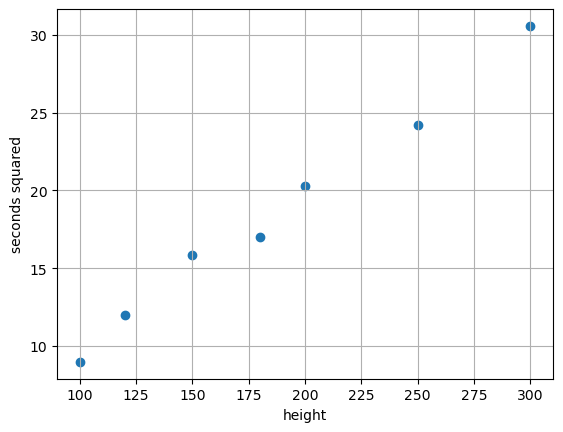

In [59]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
plt.xlabel('height')
plt.ylabel('seconds squared')
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(x,y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

In [60]:
np.corrcoef(x,y)

array([[1.        , 0.99473243],
       [0.99473243, 1.        ]])

#### Cette corrélation est de 0.99473243, une forte corrélation positive ==> on peut deduire que les deux variables sont fortement correlées

In [61]:
from scipy import stats
# Obtenir la pente(slope), intercepter(intercept) de linregress () pour tracer y = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) =stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.10280912511759172, intercept=-0.6801232361241745, rvalue=0.9947324344135698, pvalue=3.857021649169523e-06, stderr=0.004737919558962453)

Text(0, 0.5, 'seconds squared')

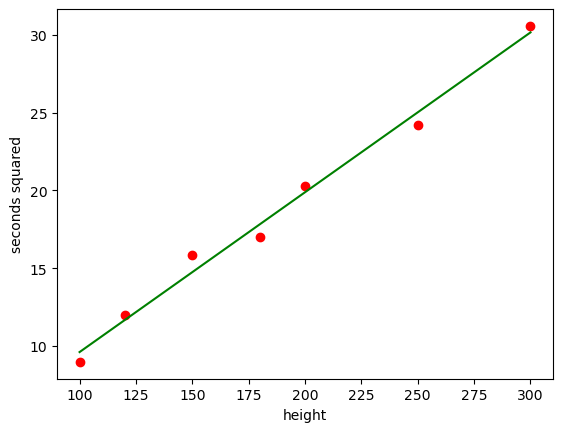

In [62]:
# Plot data points
plt.scatter(x,y, color="red", marker="o", label="Original data")
 
 
# afficher linear regression line.
y_pred = intercept + slope*x
plt.plot(x,y_pred, color="green", label="seconds squared")
 
# Set labels

plt.xlabel('height') 
plt.ylabel('seconds squared') 

#### Nous pouvons facilement obtenir cette ligne en utilisant Numpy . Numpy est un package python pour le calcul scientifique qui fournit des objets de tableaux multidimensionnels hautes performances. La fonction numpy polyfit numpy.polyfit (x, y, deg) ajuste un polynôme de degré deg aux points (x, y), renvoyant les coefficients polynomiaux qui minimisent l'erreur quadratique. Dans les lignes de code suivantes, nous obtenons les polynômes pour prédire le poids

<p style="font-size: 20px;font-family: Times New Roman;color: #000000"><strong>Exercice 2: </strong></p>
    

#### dans cet exercice on va faire la regression linéaire simple et multiple.

### Jetons un œil à l'ensemble de données ci-dessous, il contient des informations sur les étudiants

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importer les données test_scores.csv
df = pd.read_csv('test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


# Description des features

<h4> school:nom de l'école<br>
    school_setting:cadre scolaire<br>
    school_type:type de l'école<br>
    classroom:classe<br>
    teaching_method:méthode d'enseignement<br>
    n_student:nombre de étudiants<br>
    student_id:identifiant des étudiants<br>
    gender:genre<br>
    lunch:déjeuner<br>
    pretest:note de pretest<br>
    posttest:note de post test<br>
</h4>

In [5]:
# affichage d'informations sur les données 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


<AxesSubplot:>

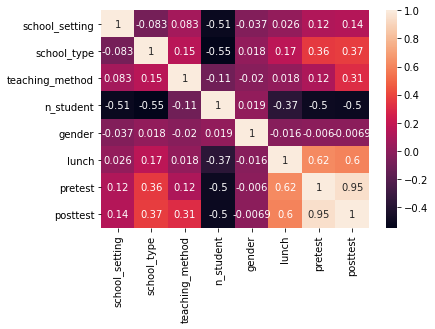

In [7]:
import seaborn as sns
# Corrélation entre les variables
# Étant donné que l'ensemble de données n'est pas trop grand, nous pouvons facilement calculer le coefficient 
# de corrélation de chaque paire de variables ==> matrice 10 x 10 symétrique
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

#### commençons par le modèle de régression linéaire bivarate (qui peut être visualisé dans l'espace 2D) est une simplification de l' équation (1) . Le modèle bivarié a la structure suivante:
   <p style="font-size: 20px;font-family: Times New Roman;color: #9e1483"><strong>y=β1X1+β0 </strong></p>

#### Essayons de comprendre les propriétés de plusieurs modèles de régression linéaire avec des visualisations. Tout d'abord, le modèle de régression linéaire bivariée 2D est visualisé , en utilisant pretest comme une seule attribut puisqu'il est le plus correlé aves le target corr=0.95.

In [8]:
X = df['pretest'].values.reshape(-1,1)
y = df['posttest'].values

In [9]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Ajuster un modèle linéaire simple à l'aide de sklearn
#### Scikit-learn est une bibliothèque d'apprentissage automatique gratuite pour python. Nous pouvons facilement implémenter une régression linéaire avec Scikit-learn en utilisant la classe LinearRegression. Après avoir créé un objet de régression linéaire, nous pouvons obtenir la ligne qui correspond le mieux à nos données en appelant la méthode fit.

In [14]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
lineaire = LinearRegression()
lineaire.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lineaire.predict(X_test)

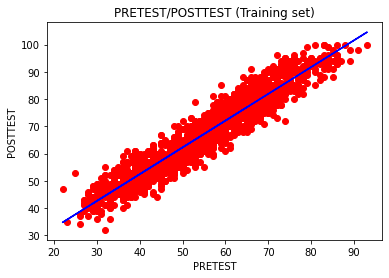

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lineaire.predict(X_train), color = 'blue')
plt.title('PRETEST/POSTTEST (Training set)')
plt.xlabel('PRETEST')
plt.ylabel('POSTTEST')
plt.show()

In [ ]:
Ensuite, on fait une liste des valeurs indépendantes et appele cette variable X.

Placez les valeurs dépendantes dans une variable appelée y.

In [18]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 4.322193312941851
le score R2 est 0.9051434691866311


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.355164674093673
le score R2 est 0.9001015446462145


#### c' est vrai que le modele donne des bonnes performances pour training et et testing data mais peut être la variable posttest depend d'autres variables 

<div style="font-size: 23px;font-family: Times New Roman;color: DarkRed"><em><strong>Qu'est-ce que la régression linéaire multiple (MLR)?</strong></em></div>


#### La régression linéaire multiple (MLR), également connue simplement sous le nom de régression multiple, est une technique statistique qui utilise plusieurs variables explicatives pour prédire le résultat d'une variable de réponse. Le but de la régression linéaire multiple (MLR) est de modéliser la relation linéaire entre les variables explicatives (indépendantes) et la variable de réponse (dépendante).

#### Essayons de representer 
À quoi ressemblerait le modèle dans l'espace 3D? Jetons un œil  . En raison de la nature 3D du tracé, plusieurs tracés ont été générés sous différents angles. Deux caractéristiques (teaching_method et pretest) ont été utilisées pour tracer la representation. Avec l'aide de la fonction supplémentaire Brittle , le modèle linéaire connaît un gain de précision significatif.

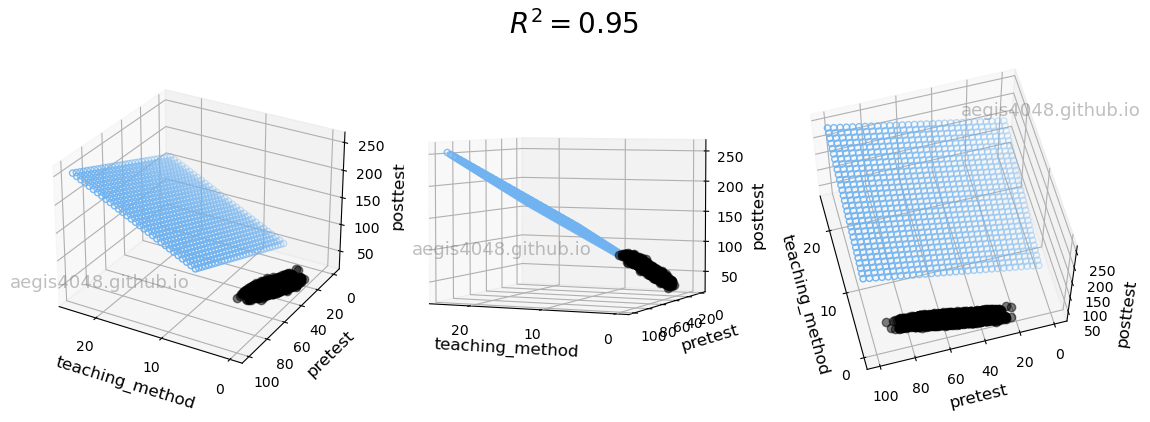

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = df[['teaching_method', 'pretest']].values.reshape(-1,2)
Y = df['posttest']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('teaching_method', fontsize=12)
    ax.set_ylabel('pretest', fontsize=12)
    ax.set_zlabel('posttest', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

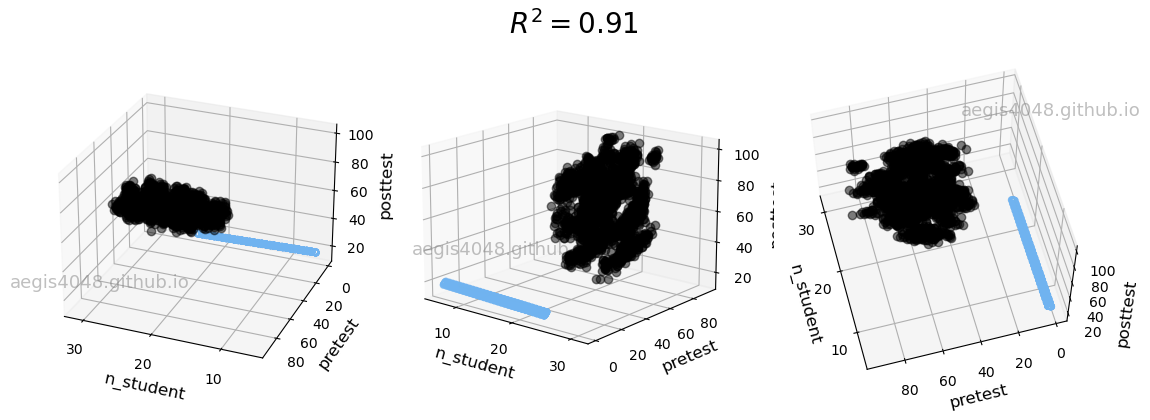

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = df[['n_student', 'pretest']].values.reshape(-1,2)
Y = df['posttest']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('n_student', fontsize=12)
    ax.set_ylabel('pretest', fontsize=12)
    ax.set_zlabel('posttest', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

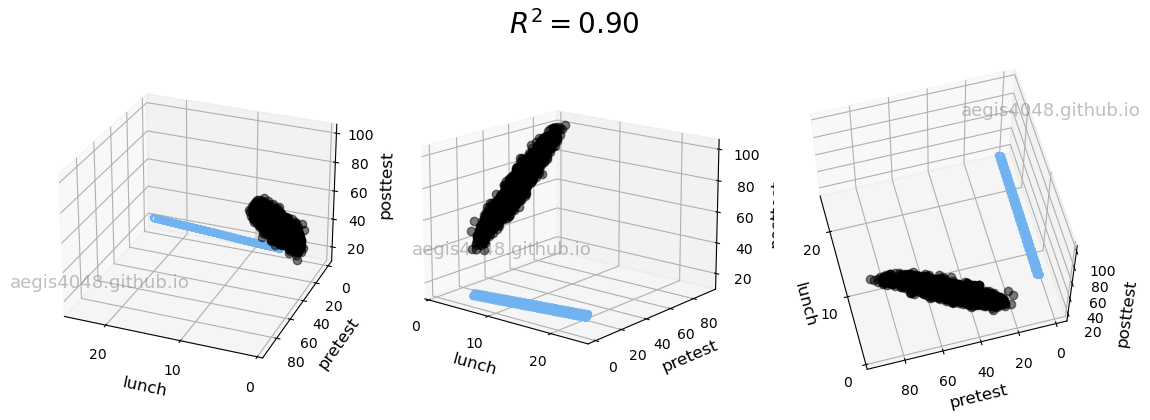

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = df[['lunch', 'pretest']].values.reshape(-1,2)
Y = df['posttest']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('lunch', fontsize=12)
    ax.set_ylabel('pretest', fontsize=12)
    ax.set_zlabel('posttest', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

### on  peut dire que posttest depend de 'teaching_method' et 'prestest' car l'algorithme admet le plus grand score =0.95

<p style="font-size: 20px;font-family: Times New Roman;color: #000000"><strong>Exercice 3: </strong></p>


In [74]:
import numpy as np ##linear algebra
import matplotlib.pyplot as plt #datapreprocessing, CSV file I/O
import pandas as pd  #for plotting graphs
import seaborn as sns 

%matplotlib inline

In [75]:
boston = df = pd.read_csv('housing.data.csv')
boston.head()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [77]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CIRM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [78]:
df.shape

(506, 14)

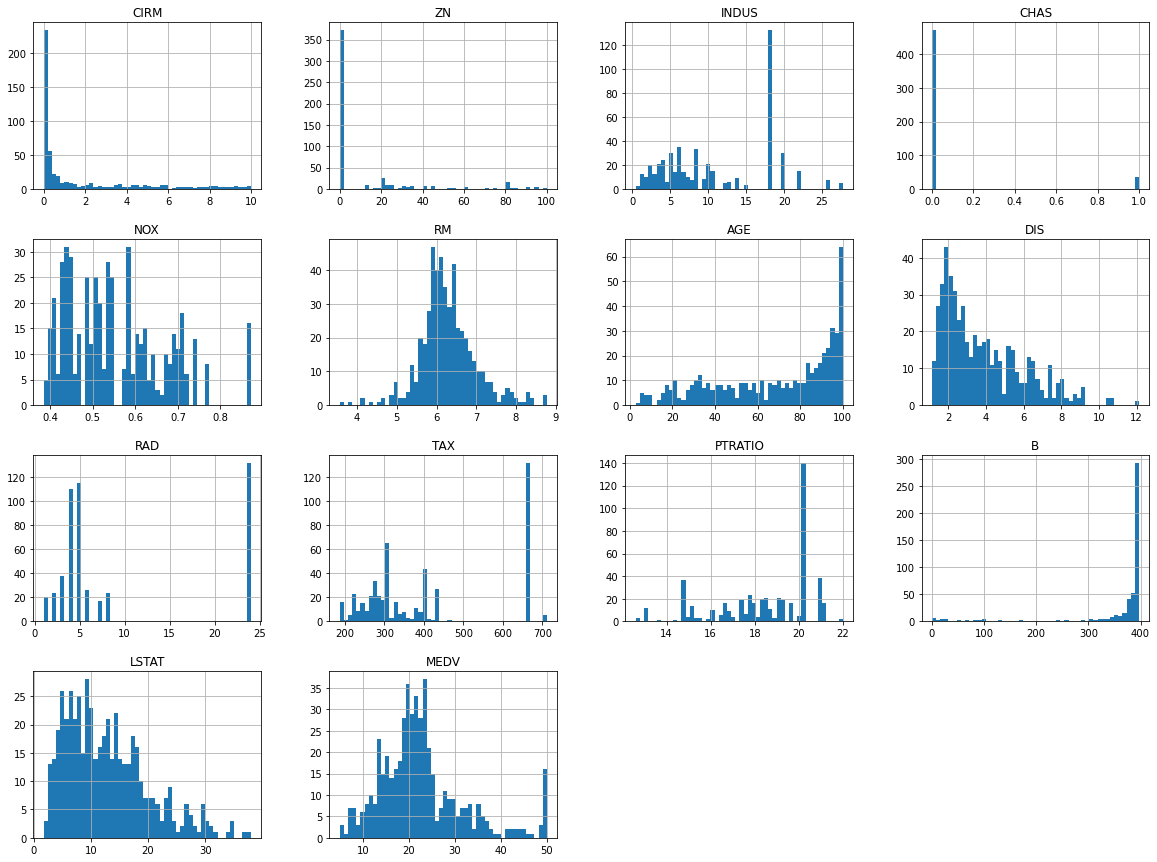

In [76]:
boston.hist(bins=50, figsize=(20,15))
plt.show()

##### Inspectant the model nugget et identifiant les coefficients estimés et l'équation de régression. 

<AxesSubplot:>

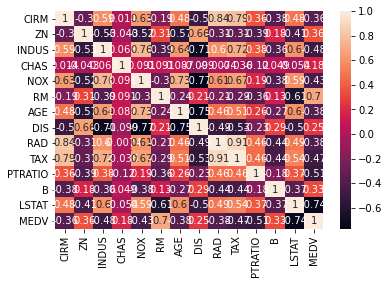

In [79]:
correlation_matrix = boston.corr()
# annot = True to print the values inside the square
sns.heatmap(correlation_matrix , annot=True)

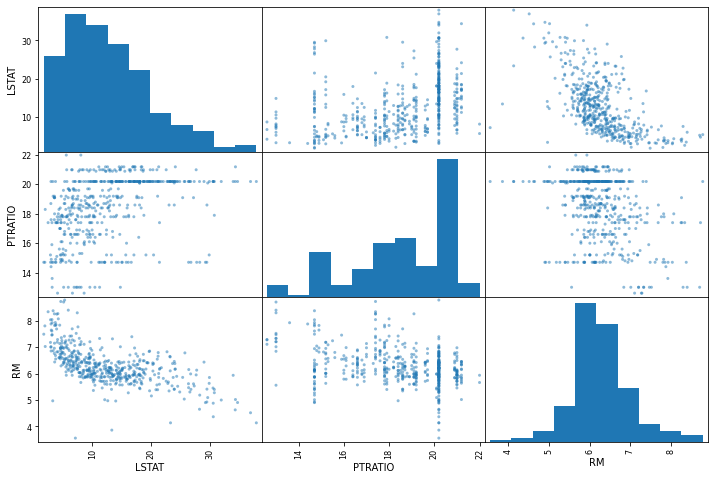

In [80]:
# Prenons les 3 premiers attibuts les plus corrélés avec 'median_house_value'
from pandas.plotting import scatter_matrix
attributes = ['LSTAT', 'PTRATIO', 'RM']
scatter_matrix(frame=boston[attributes], figsize=(12, 8))
plt.show()

In [81]:

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

#### diviser la dataset en 70 % training data and 30 % test data.

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [91]:
from sklearn.metrics import r2_score

In [94]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("performance de Training:")
print("--------------------------------------")
print('RMSE = {} '.format(rmse))
print('R2 = {} '.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("performance de Testing:")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 score = {}'.format(r2))

performance de Training:
--------------------------------------
RMSE = 5.291267334085863 
R2 = 0.6493177656003104 


performance de Testing:
--------------------------------------
RMSE = 6.041044703455955
R2 score = 0.6162026947666575


### on constate qu'on est dans le cas d'underfitting c'est à dire le modéle est trés simple par rappot aux données .

 ### generation des dependences


In [22]:
!pip install watermark

In [23]:
%load_ext watermark


In [24]:
%watermark -v -m -p numpy,pandas,matplotlib,sklearn,seaborn,mpl_toolkits

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

numpy       : 1.19.2
pandas      : 1.1.3
matplotlib  : 3.3.2
sklearn     : 0.23.2
seaborn     : 0.11.0
mpl_toolkits: unknown

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

